## Rain in Australia - Info

Predict whether or not it will rain tomorrow by training a binary classification model on target RainTomorrow

**Content**

This dataset contains daily weather observations from numerous Australian weather stations.

The target variable RainTomorrow means: Did it rain the next day? Yes or No.

Note: You should exclude the variable Risk-MM when training a binary classification model. Not excluding it will leak the answers to your model and reduce its predictability. https://www.kaggle.com/jsphyg/weather-dataset-rattle-package


##### Kernel Target

In this kernel i am going to do some basic Feature Engineering i learned from reading around the web and some udemy tutorials. I was looking for a classification problem and this dataset looked promising and interesting. I am not going to do Feature Selection Engineering and I' ll go all in. Feature Selection will be done on 2nd part.

---

---

#### IMPORTS

In [1]:
# basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# split data
from sklearn.model_selection import train_test_split

# scale data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB


# score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics


pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

----

##### LOAD DATASET

In [2]:
data = pd.read_csv('../input/weatherAUS.csv')
data.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No


----

---

#### DATA MANIPULATION

We are not going to use Location and RISK_MM.


**Note from uploader:** You should exclude the variable Risk-MM when training a binary classification model. Not excluding it will leak the answers to your model and reduce its predictability

**About Location:** In my opinion, location is an important feature  but i will avoid it for the moment just so it will be simplier for me.


#### DROP THE COLUMNS


In [3]:
data.drop(['Location','RISK_MM'], axis=1, inplace=True)

##### TAKE CARE OF RainTomorrow COLUMN

In [4]:
data['RainTomorrow'] = data['RainTomorrow'].map( {'No': 0, 'Yes': 1} ).astype(int)

---

#### DATA INFO


Type of variables

In [5]:
data.dtypes

Date              object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow       int64
dtype: object

Number of variables

In [6]:
len(data.dtypes)

22

##### SOME MORE DATA INFO

In [7]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.224181
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,0.417043
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


----

----

##### SOME MORE DATA MANIPULATION

Take advantage of date column

In [8]:
data['DateNew']= pd.to_datetime(data.Date)

In [9]:
data['Month'] = data['DateNew'].dt.month
data['Day'] = data['DateNew'].dt.day
data['Year'] = data['DateNew'].dt.year

In [10]:
data.drop(['Date','DateNew'], axis=1, inplace=True)

----

---

##### VARIABLE TYPES

**Categorical:** There are four categorical variables

In [11]:
categorical = [var for var in data.columns if data[var].dtype=='O']
#list(set(categorical))
categorical

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

**Numerical:** There are 20 numerical variables

In [12]:
numerical = [var for var in data.columns if data[var].dtype!='O']
#list(set(categorical))
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainTomorrow',
 'Month',
 'Day',
 'Year']

----

----

## STEP ONE - GET TO KNOW OUR PROBLEMS

At this point i am not doing any manipulation at all. I am just dealing with pre processing problems of our data.

---

##### FEATURE ENGINEERING

**Missing Values:** There are many missing values on our dataset.

In [13]:
data.isnull().mean()

MinTemp          0.004480
MaxTemp          0.002265
Rainfall         0.009888
Evaporation      0.427890
Sunshine         0.476929
WindGustDir      0.065615
WindGustSpeed    0.065193
WindDir9am       0.070418
WindDir3pm       0.026570
WindSpeed9am     0.009480
WindSpeed3pm     0.018496
Humidity9am      0.012476
Humidity3pm      0.025388
Pressure9am      0.098556
Pressure3pm      0.098324
Cloud9am         0.377353
Cloud3pm         0.401525
Temp9am          0.006358
Temp3pm          0.019171
RainToday        0.009888
RainTomorrow     0.000000
Month            0.000000
Day              0.000000
Year             0.000000
dtype: float64

---

**Outliers:** Checking for outliers on all numerical values. I will use boxplots.I am using multiple boxplots so it will be more clear.

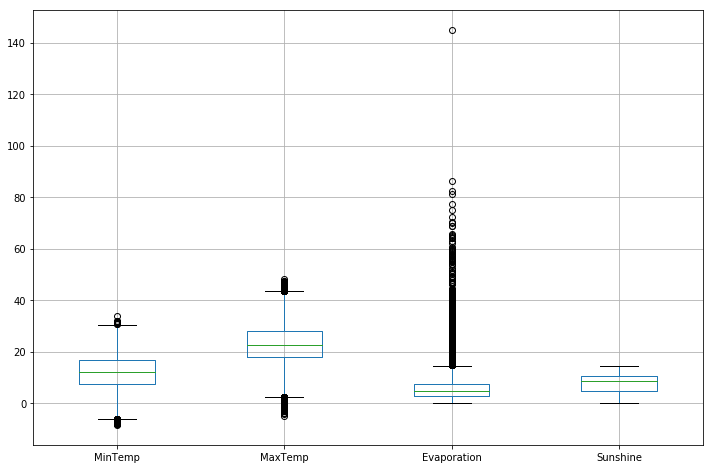

In [14]:
plt.figure(figsize=(12,8))
data.boxplot(column=['MinTemp','MaxTemp','Evaporation','Sunshine'])

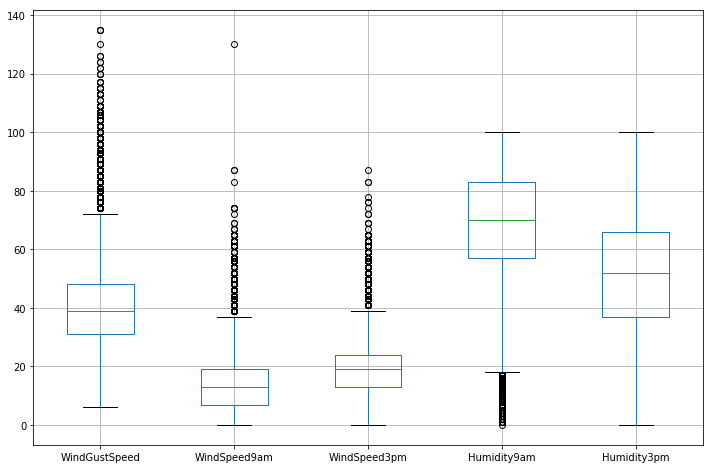

In [15]:
plt.figure(figsize=(12,8))
data.boxplot(column=['WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm'])

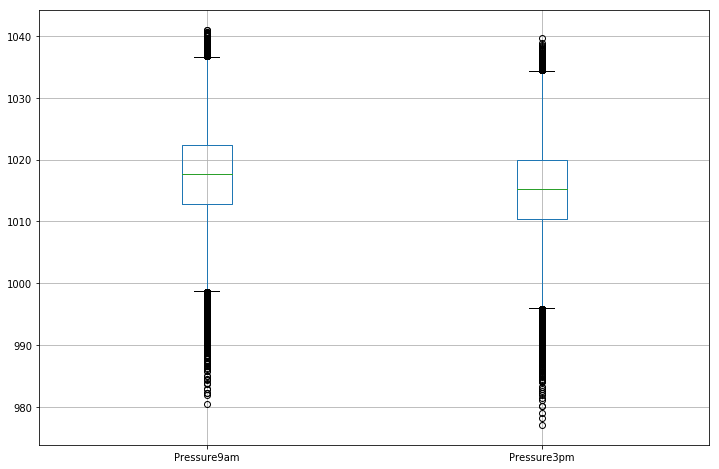

In [16]:
plt.figure(figsize=(12,8))
data.boxplot(column=['Pressure9am','Pressure3pm'])

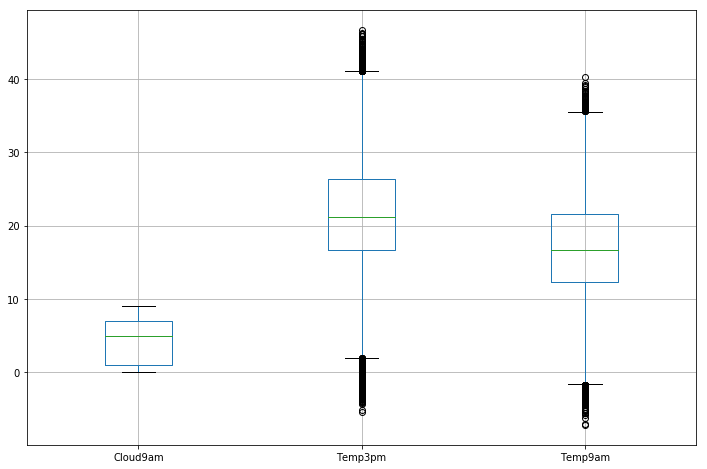

In [17]:
plt.figure(figsize=(12,8))
data.boxplot(column=['Cloud9am','Temp3pm','Temp9am'])

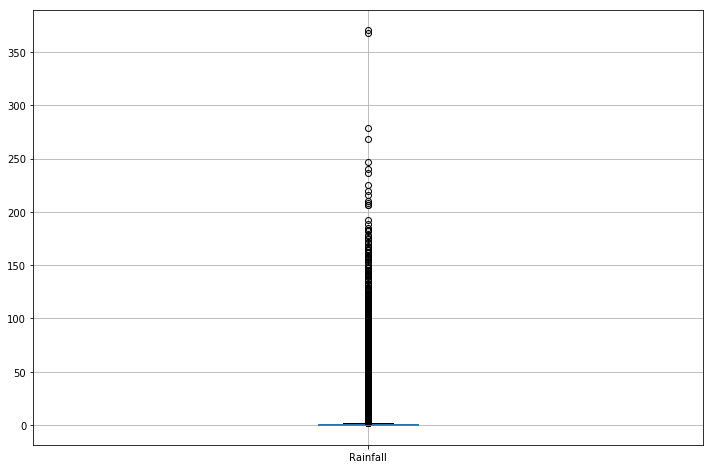

In [18]:
plt.figure(figsize=(12,8))
data.boxplot(column=['Rainfall'])

We can see that MinTemp, MaxTemp, Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Pressure9am, Pressure3pm, Temp9am, Temp3pm have outliers. Let'e check each one of theese.

**Skew or Gaussian:** In order to take care of outliers we need to know about being skew or gaussian.

Text(0.5, 0, 'MaxTemp')

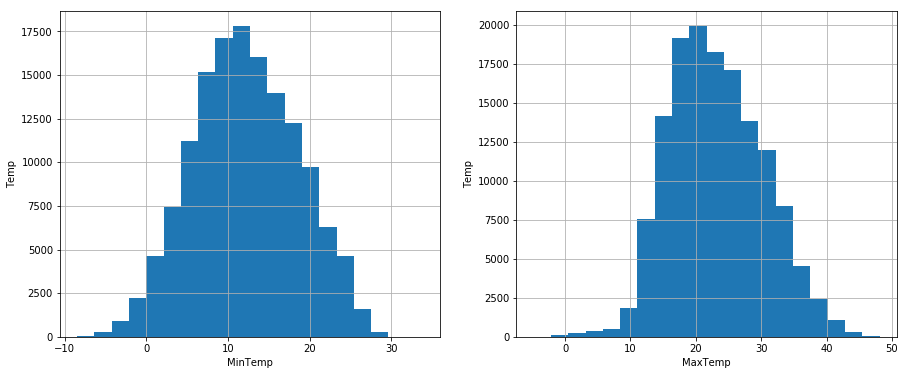

In [19]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.MinTemp.hist(bins=20)
fig.set_ylabel('Temp')
fig.set_xlabel('MinTemp')

plt.subplot(1, 2, 2)
fig = data.MaxTemp.hist(bins=20)
fig.set_ylabel('Temp')
fig.set_xlabel('MaxTemp')

Text(0.5, 0, 'mm')

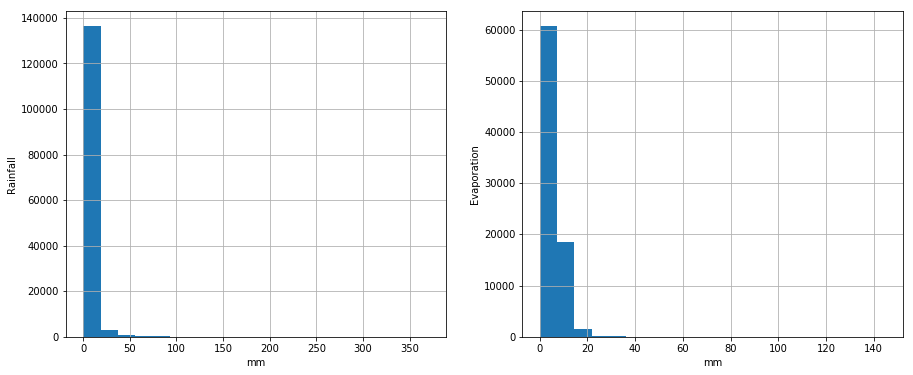

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.Rainfall.hist(bins=20)
fig.set_ylabel('Rainfall')
fig.set_xlabel('mm')

plt.subplot(1, 2, 2)
fig = data.Evaporation.hist(bins=20)
fig.set_ylabel('Evaporation')
fig.set_xlabel('mm')

Text(0.5, 0, 'WindSpeed3pm')

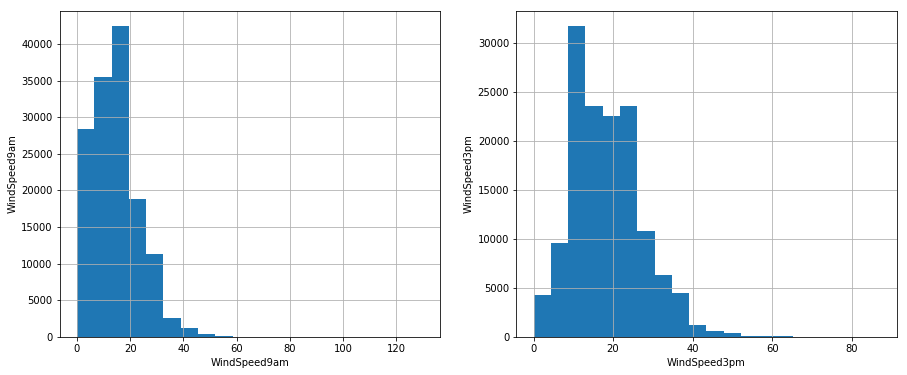

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.WindSpeed9am.hist(bins=20)
fig.set_ylabel('WindSpeed9am')
fig.set_xlabel('WindSpeed9am')

plt.subplot(1, 2, 2)
fig = data.WindSpeed3pm.hist(bins=20)
fig.set_ylabel('WindSpeed3pm')
fig.set_xlabel('WindSpeed3pm')

Text(0.5, 0, 'Humidity9am')

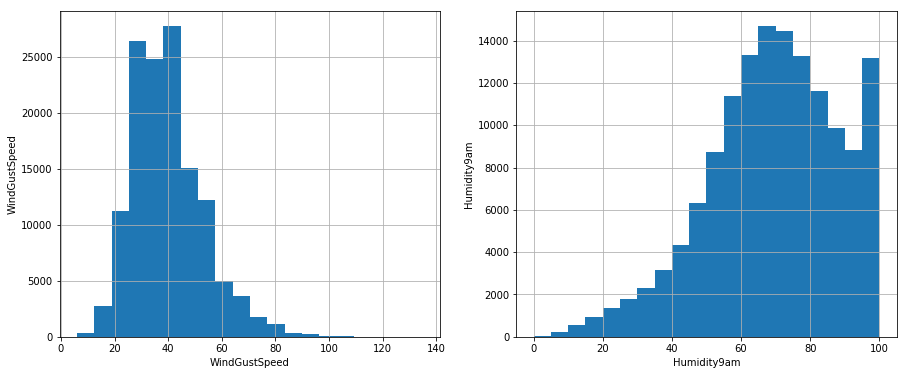

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.WindGustSpeed.hist(bins=20)
fig.set_ylabel('WindGustSpeed')
fig.set_xlabel('WindGustSpeed')

plt.subplot(1, 2, 2)
fig = data.Humidity9am.hist(bins=20)
fig.set_ylabel('Humidity9am')
fig.set_xlabel('Humidity9am')

Text(0.5, 0, 'Pressure3pm')

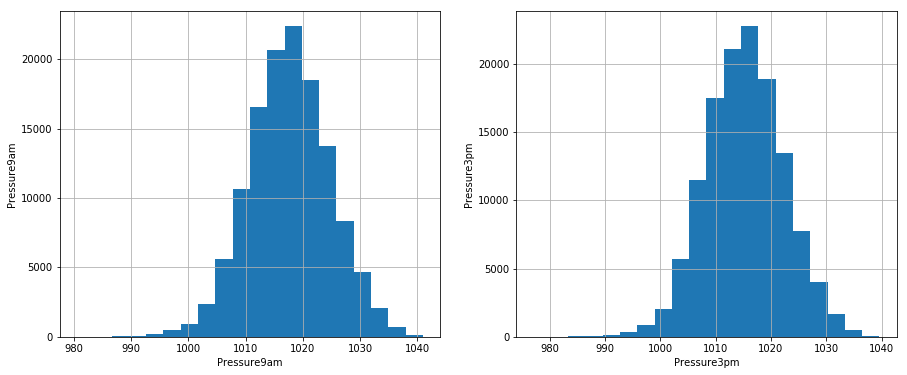

In [23]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.Pressure9am.hist(bins=20)
fig.set_ylabel('Pressure9am')
fig.set_xlabel('Pressure9am')

plt.subplot(1, 2, 2)
fig = data.Pressure3pm.hist(bins=20)
fig.set_ylabel('Pressure3pm')
fig.set_xlabel('Pressure3pm')

Text(0.5, 0, 'Temp3pm')

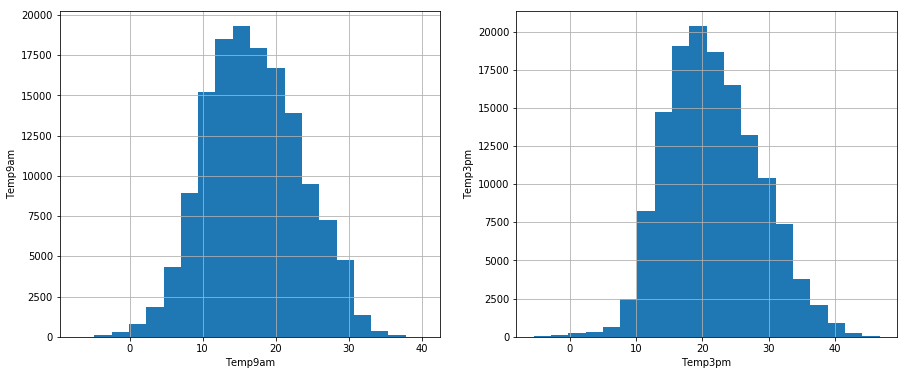

In [24]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.Temp9am.hist(bins=20)
fig.set_ylabel('Temp9am')
fig.set_xlabel('Temp9am')

plt.subplot(1, 2, 2)
fig = data.Temp3pm.hist(bins=20)
fig.set_ylabel('Temp3pm')
fig.set_xlabel('Temp3pm')

#### CONCLUSION

**Gaussian**: MinTemp, MaxTemp, WindSpeed3pm, WindGustSpeed, Pressure9am, Pressure3pm, Temp9am, Temp3pm 

**Skewed:** Rainfall, Evaporation, WindSpeed9am, Humidity9am

----

##### FIND OUTLIERS - GAUSSIAN

##### MinTemp Outliers

In [25]:
Upper_boundary = data.MinTemp.mean() + 3* data.MinTemp.std()
Lower_boundary = data.MinTemp.mean() - 3* data.MinTemp.std()
print('MinTemp outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

MinTemp outliers are values < -7.02344829528459 or > 31.396247752742788


##### MaxTemp Outliers

In [26]:
Upper_boundary = data.MaxTemp.mean() + 3* data.MaxTemp.std()
Lower_boundary = data.MaxTemp.mean() - 3* data.MaxTemp.std()
print('MaxTemp outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

MaxTemp outliers are values < 1.8739297682145555 or > 44.579638614330335


##### WindSpeed3pm Outliers

In [27]:
Upper_boundary = data.WindSpeed3pm.mean() + 3* data.WindSpeed3pm.std()
Lower_boundary = data.WindSpeed3pm.mean() - 3* data.WindSpeed3pm.std()
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

WindSpeed3pm outliers are values < -7.772459246913819 or > 45.04761097050818


###### WindGustSpeed Outliers

In [28]:
Upper_boundary = data.WindGustSpeed.mean() + 3* data.WindGustSpeed.std()
Lower_boundary = data.WindGustSpeed.mean() - 3* data.WindGustSpeed.std()
print('WindGustSpeed outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

WindGustSpeed outliers are values < -0.7821106388871897 or > 80.75069395403958


##### Pressure9am Outliers

In [29]:
Upper_boundary = data.Pressure9am.mean() + 3* data.Pressure9am.std()
Lower_boundary = data.Pressure9am.mean() - 3* data.Pressure9am.std()
print('Pressure9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

Pressure9am outliers are values < 996.3373312814158 or > 1038.9701855505405


###### Pressure3pm Outliers

In [30]:
Upper_boundary = data.Pressure3pm.mean() + 3* data.Pressure3pm.std()
Lower_boundary = data.Pressure3pm.mean() - 3* data.Pressure3pm.std()
print('Pressure3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

Pressure3pm outliers are values < 994.1481731874258 or > 1036.3682338883882


##### Temp9am Outliers

In [31]:
Upper_boundary = data.Temp9am.mean() + 3* data.Temp9am.std()
Lower_boundary = data.Temp9am.mean() - 3* data.Temp9am.std()
print('Temp9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

Temp9am outliers are values < -2.4910063947346615 or > 36.46602355813732


###### Temp3pm Outliers

In [32]:
Upper_boundary = data.Temp3pm.mean() + 3* data.Temp3pm.std()
Lower_boundary = data.Temp3pm.mean() - 3* data.Temp3pm.std()
print('Temp3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

Temp3pm outliers are values < 0.8744533675467494 or > 42.50001657874813


---

##### FIND OUTLIERS - SKEWED

##### Rainfall Outliers

In [33]:
IQR = data.Rainfall.quantile(0.75) - data.Rainfall.quantile(0.25)
Lower_fence = data.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = data.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


##### Evaporation Outliers

In [34]:
IQR = data.Evaporation.quantile(0.75) - data.Evaporation.quantile(0.25)
Lower_fence = data.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = data.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


##### WindSpeed9am Outliers

In [35]:
IQR = data.WindSpeed9am.quantile(0.75) - data.WindSpeed9am.quantile(0.25)
Lower_fence = data.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = data.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


###### Humidity9am Outliers

In [36]:
IQR = data.Humidity9am.quantile(0.75) - data.Humidity9am.quantile(0.25)
Lower_fence = data.Humidity9am.quantile(0.25) - (IQR * 3)
Upper_fence = data.Humidity9am.quantile(0.75) + (IQR * 3)
print('Humidity9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Humidity9am outliers are values < -21.0 or > 161.0


----

**Rare Labels:** There are no rare labels. All atributes are seen more than 1%

In [37]:
for var in ['WindGustDir',  'WindDir9am', 'WindDir3pm']:
    print(data[var].value_counts() / np.float(len(data)))
    print()

W      0.068780
SE     0.065467
E      0.063794
N      0.063526
SSE    0.063245
S      0.062936
WSW    0.062598
SW     0.061867
SSW    0.060552
WNW    0.056726
NW     0.056283
ENE    0.056205
ESE    0.051374
NE     0.049651
NNW    0.046142
NNE    0.045241
Name: WindGustDir, dtype: float64

N      0.080123
SE     0.064434
E      0.063463
SSE    0.063055
NW     0.060144
S      0.059729
W      0.058090
SW     0.057928
NNE    0.055896
NNW    0.055136
ENE    0.054398
ESE    0.053153
NE     0.052935
SSW    0.052380
WNW    0.050593
WSW    0.048125
Name: WindDir9am, dtype: float64

SE     0.074990
W      0.069701
S      0.067500
WSW    0.065608
SW     0.064574
SSE    0.064293
N      0.060952
WNW    0.060875
NW     0.059553
ESE    0.058948
E      0.058667
NE     0.057415
SSW    0.056332
NNW    0.054384
ENE    0.054321
NNE    0.045319
Name: WindDir3pm, dtype: float64



----

**Cardinlity:** Nope.

In [38]:
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')

WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels


----

----

##### SPLIT DATA TO AVOID OVERFITTING WHILE ENGINEERING

In [39]:
X = data.drop('RainTomorrow', axis=1)

In [40]:
y = data[['RainTomorrow']]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((113754, 23), (28439, 23))

-----

----


##### ENGINEER NUMERICAL MISSING VALUES

In [42]:
numerical = [var for var in X_train.columns if data[var].dtype!='O']

In [43]:
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

MinTemp 0.0043514953320322805
MaxTemp 0.002320797510417216
Rainfall 0.01001283471350458
Evaporation 0.4282750496685831
Sunshine 0.47746892416969955
WindGustSpeed 0.06476255780016527
WindSpeed9am 0.009546917031489003
WindSpeed3pm 0.018408143889445647
Humidity9am 0.012738013608312674
Humidity3pm 0.02540570001933998
Pressure9am 0.09856356699544631
Pressure3pm 0.09833500360426886
Cloud9am 0.3792130386623767
Cloud3pm 0.4023418956696028
Temp9am 0.006505265748896742
Temp3pm 0.019085043163317335


##### FILL ALL MISSING VALUES WITH MEAN

In [44]:
for col in numerical:
    X_train[col] = X_train[col].fillna((X_train[col].mean()))

In [45]:
for col in numerical:
    X_test[col] = X_test[col].fillna((X_test[col].mean()))

##### ENGINEER CATECORIGAL MISSING VALUES

In [46]:
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

WindGustDir 0.06511419378659213
WindDir9am 0.07013379749283542
WindDir3pm 0.026443026179299188
RainToday 0.01001283471350458


In [47]:
for df in [X_train, X_test]:
    df['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

---

In [48]:
X_train.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Month            0
Day              0
Year             0
dtype: int64

In [49]:
X_test.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Month            0
Day              0
Year             0
dtype: int64

----

---

##### ENGINEER OUTLIERS

In [50]:
to_describe = ['MinTemp','MaxTemp','WindSpeed3pm','WindGustSpeed','Pressure9am','Pressure3pm',
               'Temp9am','Temp3pm','Rainfall','Evaporation','WindSpeed9am','Humidity9am']

In [51]:
X_train[to_describe].describe()

,MinTemp,MaxTemp,WindSpeed3pm,WindGustSpeed,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Rainfall,Evaporation,WindSpeed9am,Humidity9am
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.194343,23.238699,18.611051,39.945294,1017.645094,1015.245583,16.996994,21.700096,2.344020,5.478666,13.991994,68.852874
std,6.388267,7.094082,8.703036,13.114896,6.738667,6.675155,6.463728,6.855157,8.460649,3.151835,8.831738,18.935150
min,-8.200000,-4.800000,0.000000,6.000000,980.500000,977.100000,-7.200000,-5.400000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,18.000000,13.000000,31.000000,1013.500000,1011.000000,12.300000,16.700000,0.000000,4.000000,7.000000,57.000000
50%,12.000000,22.700000,18.611051,39.000000,1017.645094,1015.245583,16.800000,21.300000,0.000000,5.478666,13.000000,70.000000
75%,16.800000,28.200000,24.000000,46.000000,1021.800000,1019.400000,21.500000,26.300000,0.800000,5.478666,19.000000,83.000000
max,33.900000,48.100000,83.000000,135.000000,1041.000000,1039.600000,40.200000,46.700000,371.000000,86.200000,130.000000,100.000000


### Outliers

##### Gaussian

- MinTemp:            -7.02 to 31.39
- MaxTemp:             1.87 to 44.57
- WindSpeed3pm:       -7.77 to 45.04 (!)
- WindGustSpeed:      -0.78 to 80.75 (!)
- Pressure9am:         996.33 to 1038.97
- Pressure3pm:         994.14 to 1036.36
- Temp9am:            -2.49 to 36.46
- Temp3pm:             0.87 to 42.50

##### Skewed

- Rainfall:           -2.40 to 3.20
- Evaporation:        -11.80 to 21.80
- WindSpeed9am:       -29.0 to 55.00
- Humidity9am:        -21.00 to 161.00

In [52]:
def top_code(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])

In [53]:
def bottom_code(df, variable, bottom):
    return np.where(df[variable]<bottom, bottom, df[variable])

In [54]:
for df in [X_train, X_test]:
    df['MinTemp'] = top_code(df, 'MinTemp', 31.38)
    df['MinTemp'] = bottom_code(df, 'MinTemp', -7.02)
    df['MaxTemp'] = top_code(df, 'MaxTemp', 44.57)
    df['MaxTemp'] = bottom_code(df, 'MaxTemp', 1.87)
    df['WindSpeed3pm'] = top_code(df, 'WindSpeed3pm', 45.04)
    df['WindGustSpeed'] = top_code(df, 'WindGustSpeed', 80.75)
    df['Pressure9am'] = top_code(df, 'Pressure9am', 1038.97)
    df['Pressure9am'] = bottom_code(df, 'Pressure9am', 996.33)
    df['Pressure3pm'] = top_code(df, 'Pressure3pm', 1036.36)
    df['Pressure3pm'] = bottom_code(df, 'Pressure3pm', 994.14)
    df['Temp9am'] = top_code(df, 'Temp9am', 36.46)
    df['Temp9am'] = bottom_code(df, 'Temp9am', -2.49)
    df['Temp3pm'] = top_code(df, 'Temp3pm', 42.50)
    df['Temp3pm'] = bottom_code(df, 'Temp3pm', 0.87)
    
    df['Rainfall'] = top_code(df, 'Rainfall', 3.20)
    df['Evaporation'] = top_code(df, 'Evaporation', 21.80)
    df['WindSpeed9am'] = top_code(df, 'WindSpeed9am', 55.00)
    df['Humidity9am'] = top_code(df, 'Humidity9am', 161.00)

In [55]:
X_train[to_describe].describe()

,MinTemp,MaxTemp,WindSpeed3pm,WindGustSpeed,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Rainfall,Evaporation,WindSpeed9am,Humidity9am
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.194380,23.241032,18.576075,39.867789,1017.655532,1015.253792,16.997534,21.702172,0.698550,5.442262,13.987625,68.852874
std,6.387962,7.082760,8.574757,12.821026,6.699216,6.643253,6.460218,6.842096,1.193418,2.807437,8.806034,18.935150
min,-7.020000,1.870000,0.000000,6.000000,996.330000,994.140000,-2.490000,0.870000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,18.000000,13.000000,31.000000,1013.500000,1011.000000,12.300000,16.700000,0.000000,4.000000,7.000000,57.000000
50%,12.000000,22.700000,18.611051,39.000000,1017.645094,1015.245583,16.800000,21.300000,0.000000,5.478666,13.000000,70.000000
75%,16.800000,28.200000,24.000000,46.000000,1021.800000,1019.400000,21.500000,26.300000,0.800000,5.478666,19.000000,83.000000
max,31.380000,44.570000,45.040000,80.750000,1038.970000,1036.360000,36.460000,42.500000,3.200000,21.800000,55.000000,100.000000


In [56]:
X_test[to_describe].describe()

,MinTemp,MaxTemp,WindSpeed3pm,WindGustSpeed,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Rainfall,Evaporation,WindSpeed9am,Humidity9am
count,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000
mean,12.154661,23.183780,18.700790,40.060142,1017.698587,1015.317799,16.950220,21.639516,0.699866,5.393268,14.037132,68.807605
std,6.391392,7.155249,8.634651,12.927978,6.738489,6.673885,6.501764,6.917275,1.194764,2.758790,8.901778,18.920070
min,-7.020000,1.870000,0.000000,7.000000,996.330000,994.140000,-2.490000,0.870000,0.000000,0.000000,0.000000,1.000000
25%,7.600000,17.900000,13.000000,31.000000,1013.500000,1011.100000,12.200000,16.600000,0.000000,4.000000,7.000000,57.000000
50%,12.000000,22.600000,18.743719,39.000000,1017.688415,1015.308680,16.700000,21.200000,0.000000,5.434578,13.000000,69.000000
75%,16.800000,28.200000,24.000000,46.000000,1021.800000,1019.500000,21.500000,26.300000,0.800000,5.434578,19.000000,83.000000
max,31.380000,44.570000,45.040000,80.750000,1038.970000,1036.360000,36.460000,42.500000,3.200000,21.800000,55.000000,100.000000


---

---

##### ENCODE CATEGORICAL VARIABLES

In [57]:
categorical

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [58]:
for df in [X_train, X_test]:
    df['WindGustDir']  = pd.get_dummies(df.WindGustDir, drop_first=False)
    df['WindDir9am']  = pd.get_dummies(df.WindDir9am, drop_first=False)
    df['WindDir3pm']  = pd.get_dummies(df.WindDir3pm, drop_first=False)
    df['RainToday']  = pd.get_dummies(df.RainToday, drop_first=False)

---

---

##### SCALE DATA

In [59]:
mx = MinMaxScaler()

In [60]:
X_train_mx = mx.fit_transform(X_train)

In [61]:
X_test_mx = mx.fit_transform(X_test)

---

##### PREDICTIONS

##### KNN

In [62]:
knn = KNeighborsClassifier()

In [63]:
knn.fit(X_train_mx, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [64]:
predictions = knn.predict(X_test_mx)

In [65]:
print(accuracy_score(y_test, predictions))

0.833221983895355


In [66]:
print(confusion_matrix(y_test, predictions))

[[20697  1370]
 [ 3373  2999]]


In [67]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     22067
           1       0.69      0.47      0.56      6372

   micro avg       0.83      0.83      0.83     28439
   macro avg       0.77      0.70      0.73     28439
weighted avg       0.82      0.83      0.82     28439



##### Logistic Regression

In [68]:
logreg = LogisticRegression()

In [69]:
logreg.fit(X_train_mx, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
predictions = logreg.predict(X_test_mx)

In [71]:
print(accuracy_score(y_test, predictions))

0.8441928337845915


In [72]:
print(confusion_matrix(y_test, predictions))

[[21031  1036]
 [ 3395  2977]]


In [73]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22067
           1       0.74      0.47      0.57      6372

   micro avg       0.84      0.84      0.84     28439
   macro avg       0.80      0.71      0.74     28439
weighted avg       0.83      0.84      0.83     28439



##### Gaussian

In [74]:
gaussian = GaussianNB()

In [75]:
gaussian.fit(X_train_mx, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [76]:
predictions = gaussian.predict(X_test_mx)

In [77]:
print(accuracy_score(y_test, predictions))

0.7829740848834347


In [78]:
print(confusion_matrix(y_test, predictions))

[[18009  4058]
 [ 2114  4258]]


In [79]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85     22067
           1       0.51      0.67      0.58      6372

   micro avg       0.78      0.78      0.78     28439
   macro avg       0.70      0.74      0.72     28439
weighted avg       0.81      0.78      0.79     28439



Theese are some pretty bad results i guess but for now i just want to familiarize on Feature Engineering.

Any suggestions would be welcome. Have fun xD